In [1]:
import sys
sys.path.insert(0, '../PINNs/Utilities/')

import torch
from collections import OrderedDict

from pyDOE import lhs
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.interpolate import griddata
from plotting import newfig, savefig
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import time

np.random.seed(1234)

/home/duanwuchen/anaconda3/envs/torch/lib/python3.9/_collections_abc.py:941: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [2]:
data = scipy.io.loadmat('burgers_shock.mat')

In [3]:
t = data['t'].flatten()[:,None]
x = data['x'].flatten()[:,None]
Exact = np.real(data['usol']).T

X, T = np.meshgrid(x,t)

X_star = np.hstack((X.flatten()[:,None], T.flatten()[:,None]))
u_star = Exact.flatten()[:,None]              

# Doman bounds
lb = X_star.min(0)
ub = X_star.max(0)

xx1 = np.hstack((X[0:1,:].T, T[0:1,:].T)) # Left boundary, t=0
uu1 = Exact[0:1,:].T
xx2 = np.hstack((X[:,0:1], T[:,0:1])) # Lower boundary, x=-1
uu2 = Exact[:,0:1]
xx3 = np.hstack((X[:,-1:], T[:,-1:])) # Upper boundary, x=0
uu3 = Exact[:,-1:]

In [4]:
np.vstack([xx1, xx2, xx3])

array([[-1.        ,  0.        ],
       [-0.99215686,  0.        ],
       [-0.98431373,  0.        ],
       [-0.97647059,  0.        ],
       [-0.96862745,  0.        ],
       [-0.96078431,  0.        ],
       [-0.95294118,  0.        ],
       [-0.94509804,  0.        ],
       [-0.9372549 ,  0.        ],
       [-0.92941176,  0.        ],
       [-0.92156863,  0.        ],
       [-0.91372549,  0.        ],
       [-0.90588235,  0.        ],
       [-0.89803922,  0.        ],
       [-0.89019608,  0.        ],
       [-0.88235294,  0.        ],
       [-0.8745098 ,  0.        ],
       [-0.86666667,  0.        ],
       [-0.85882353,  0.        ],
       [-0.85098039,  0.        ],
       [-0.84313725,  0.        ],
       [-0.83529412,  0.        ],
       [-0.82745098,  0.        ],
       [-0.81960784,  0.        ],
       [-0.81176471,  0.        ],
       [-0.80392157,  0.        ],
       [-0.79607843,  0.        ],
       [-0.78823529,  0.        ],
       [-0.78039216,

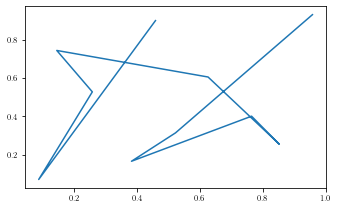

In [10]:
X = lhs(2,10)
plt.plot(X[:, 0], X[:, 1])

In [11]:
print(np.shape(t))
print(np.shape(x))

(100, 1)
(256, 1)


In [13]:
print(t)

[[0.  ]
 [0.01]
 [0.02]
 [0.03]
 [0.04]
 [0.05]
 [0.06]
 [0.07]
 [0.08]
 [0.09]
 [0.1 ]
 [0.11]
 [0.12]
 [0.13]
 [0.14]
 [0.15]
 [0.16]
 [0.17]
 [0.18]
 [0.19]
 [0.2 ]
 [0.21]
 [0.22]
 [0.23]
 [0.24]
 [0.25]
 [0.26]
 [0.27]
 [0.28]
 [0.29]
 [0.3 ]
 [0.31]
 [0.32]
 [0.33]
 [0.34]
 [0.35]
 [0.36]
 [0.37]
 [0.38]
 [0.39]
 [0.4 ]
 [0.41]
 [0.42]
 [0.43]
 [0.44]
 [0.45]
 [0.46]
 [0.47]
 [0.48]
 [0.49]
 [0.5 ]
 [0.51]
 [0.52]
 [0.53]
 [0.54]
 [0.55]
 [0.56]
 [0.57]
 [0.58]
 [0.59]
 [0.6 ]
 [0.61]
 [0.62]
 [0.63]
 [0.64]
 [0.65]
 [0.66]
 [0.67]
 [0.68]
 [0.69]
 [0.7 ]
 [0.71]
 [0.72]
 [0.73]
 [0.74]
 [0.75]
 [0.76]
 [0.77]
 [0.78]
 [0.79]
 [0.8 ]
 [0.81]
 [0.82]
 [0.83]
 [0.84]
 [0.85]
 [0.86]
 [0.87]
 [0.88]
 [0.89]
 [0.9 ]
 [0.91]
 [0.92]
 [0.93]
 [0.94]
 [0.95]
 [0.96]
 [0.97]
 [0.98]
 [0.99]]
